In [1]:
import computeHVSR as hvsr

[INFO] remove_outliers: False

[ERR] missing parameter net



computeHVSR.py (V.2020.155):

This script uses IRIS DMC's MUSTANG noise-pdf web service (http://service.iris.edu/mustang/) to
compute  horizontal-to-vertical spectral ratio (HVSR) and obtain the predominant frequency at the station
site. The amplitude of the HVSR curves represent the ratio of the smoothed amplitude spectra for the 
horizontal and vertical components as obtained from PSDs. Script provides the following options:
  - Remove PSDs that fall outside the station noise baseline, as computed by 
    computeStationChannelBaseline.py script (parameter removeoutliers=0|1)
  - Compute HVSR using one of the methods below (parameter: method=1|2|3|4|5|6)
    For a review o0f methods 2-6 see Albarello and Lunedei (2013). 
		(1) DFA, Diffuse Field Assumption method (Sanchez-Sesma et al., 2011)

		NOTE: The MUSTANG noise-psd web service Power Spectral Density estimate for seismic channels are
		      computed using the algorit

SystemExit: 

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\interactiveshell.py:3406: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [3]:

def calculate_hvsr(time, acceleration):
    # Menghitung FFT percepatan
    fft_acc = np.fft.fft(acceleration)
    
    # Menghitung PSD (Power Spectral Density)
    psd_acc = np.abs(fft_acc) ** 2
    
    # Menentukan komponen frekuensi
    freq = np.fft.fftfreq(len(time), time[1] - time[0])
    
    # Menghitung HVSR
    hvsr = np.zeros(len(freq))
    for i, f in enumerate(freq):
        if f >= 0:
            # Mencari indeks frekuensi terdekat
            idx = np.abs(freq - f).argmin()
            
            # Menghitung HVSR
            hvsr[i] = np.sqrt(psd_acc[idx])
    
    return freq, hvsr


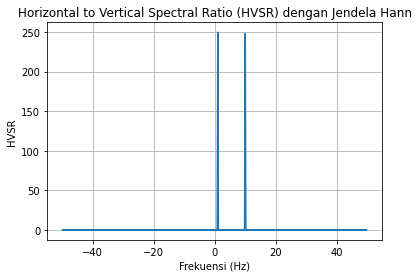

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def apply_window(data, window_type='hann'):
    """
    Mengaplikasikan jendela pada data percepatan.

    Args:
        data (array): Data percepatan.
        window_type (str): Jenis jendela yang akan digunakan.
            Pilihan: 'hann' (default), 'hamming', 'blackman', 'bartlett'.

    Returns:
        array: Data dengan jendela yang diterapkan.
    """
    if window_type == 'hann':
        window = np.hanning(len(data))
    elif window_type == 'hamming':
        window = np.hamming(len(data))
    elif window_type == 'blackman':
        window = np.blackman(len(data))
    elif window_type == 'bartlett':
        window = np.bartlett(len(data))
    else:
        raise ValueError("Jenis jendela tidak valid.")

    return data * window

# Contoh penggunaan
# Data percepatan
time = np.linspace(0, 10, 1000)
acceleration = np.sin(2 * np.pi * 1 * time) + np.sin(2 * np.pi * 10 * time)

# Menerapkan jendela Hann pada data percepatan
windowed_acceleration = apply_window(acceleration, 'hann')

# Menghitung HVSR pada data dengan jendela
freq, hvsr = calculate_hvsr(time, windowed_acceleration)

# Menampilkan plot HVSR
plt.plot(freq, hvsr)
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('HVSR')
plt.title('Horizontal to Vertical Spectral Ratio (HVSR) dengan Jendela Hann')
plt.grid(True)
plt.show()


In [1]:
print("j")

j


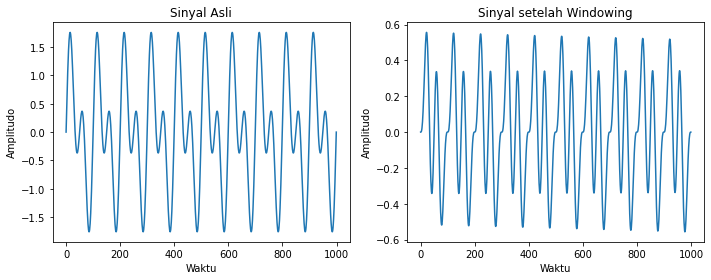

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menghasilkan sinyal dengan HVS
def generate_hvs_signal():
    t = np.linspace(0, 10, 1000)  # Waktu dari 0 hingga 10 detik dengan 1000 titik
    signal = np.sin(2 * np.pi * t) + np.sin(4 * np.pi * t)  # Sinyal dengan dua komponen frekuensi
    return signal

# Fungsi untuk menerapkan windowing pada sinyal
def apply_window(signal, window_size):
    window = np.hanning(window_size)  # Menggunakan window Hanning
    num_windows = len(signal) // window_size
    windowed_signal = np.zeros_like(signal)

    for i in range(num_windows):
        start = i * window_size
        end = start + window_size
        windowed_signal[start:end] = signal[start:end] * window

    return windowed_signal

# Menghasilkan sinyal HVS
signal = generate_hvs_signal()

# Mengatur ukuran jendela (window) yang ingin digunakan
window_size = 100

# Menerapkan windowing pada sinyal
windowed_signal = apply_window(signal, window_size)

# Menampilkan plot sinyal asli
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(signal)
plt.title('Sinyal Asli')
plt.xlabel('Waktu')
plt.ylabel('Amplitudo')

# Menampilkan plot sinyal setelah diterapkan windowing
plt.subplot(1, 2, 2)
plt.plot(windowed_signal)
plt.title('Sinyal setelah Windowing')
plt.xlabel('Waktu')
plt.ylabel('Amplitudo')

plt.tight_layout()
plt.show()


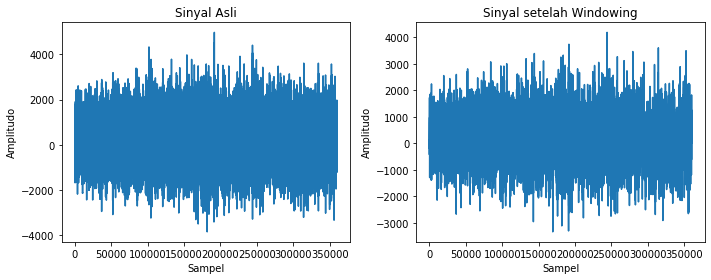

In [4]:
import obspy
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menerapkan windowing pada sinyal
def apply_window(signal, window_size):
    window = np.hanning(window_size)  # Menggunakan window Hanning
    num_windows = len(signal) // window_size
    windowed_signal = np.zeros_like(signal)

    for i in range(num_windows):
        start = i * window_size
        end = start + window_size
        windowed_signal[start:end] = signal[start:end] * window

    return windowed_signal

# Path file MiniSEED
file_path = 'UT.STN12.A2_C150.miniseed'

# Membaca data MiniSEED menggunakan ObsPy
st = obspy.read(file_path)

# Mengambil komponen vertikal (Z) dari data seismik
signal = st[0].data

# Mengatur ukuran jendela (window) yang ingin digunakan
window_size = 100

# Menerapkan windowing pada sinyal
windowed_signal = apply_window(signal, window_size)

# Menampilkan plot sinyal asli
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(signal)
plt.title('Sinyal Asli')
plt.xlabel('Sampel')
plt.ylabel('Amplitudo')

# Menampilkan plot sinyal setelah diterapkan windowing
plt.subplot(1, 2, 2)
plt.plot(windowed_signal)
plt.title('Sinyal setelah Windowing')
plt.xlabel('Sampel')
plt.ylabel('Amplitudo')

plt.tight_layout()
plt.show()


In [ ]:
import obspy
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menerapkan windowing pada sinyal
def apply_window(signal, window_size):
    window = np.hanning(window_size)  # Menggunakan window Hanning
    num_windows = len(signal) // window_size
    windowed_signal = np.zeros_like(signal)

    for i in range(num_windows):
        start = i * window_size
        end = start + window_size
        windowed_signal[start:end] = signal[start:end] * window

    return windowed_signal

# Path file MiniSEED
file_path_z = 'UT.STN12.A2_C150.miniseed'
file_path_h = 'UT.STN12.A2_C150.miniseed'

# Membaca data MiniSEED menggunakan ObsPy
st_z = obspy.read(file_path_z[0])
st_h = obspy.read(file_path_h[1])

# Mengambil data komponen vertikal (Z) dan horizontal (H) dari data seismik
signal_z = st_z[0].data
signal_h = st_h[0].data

# Mengatur ukuran jendela (window) yang ingin digunakan
window_size = 100

# Menerapkan windowing pada sinyal vertikal dan horizontal
windowed_signal_z = apply_window(signal_z, window_size)
windowed_signal_h = apply_window(signal_h, window_size)

# Menghitung spektrum daya dari sinyal vertikal dan horizontal
spectrum_z = np.abs(np.fft.fft(windowed_signal_z))**2
spectrum_h = np.abs(np.fft.fft(windowed_signal_h))**2

# Menghitung HVSR (Horizontal to Vertical Spectral Ratio)
hvsr = np.sqrt(spectrum_h / spectrum_z)

# Menampilkan plot HVSR
plt.plot(hvsr)
plt.title('HVS (Horizontal to Vertical Spectral Ratio)')
plt.xlabel('Frekuensi')
plt.ylabel('Amplitudo')
plt.show()


In [10]:
import obspy
import matplotlib.pyplot as plt

# Path file MiniSEED
file_path = 'D:\kerja\magang_software\data\data\data\waveform\TA.J36A..BHZ__20120101T000000Z__20120102T000000Z.mseed'

# Membaca data MiniSEED menggunakan ObsPy
st = obspy.read(file_path)

# Memisahkan komponen X, Y, dan Z
trace_x = st.select(channel="HN1")[0]
trace_y = st.select(channel="HN2")[0]
trace_z = st.select(channel="HNZ")[0]

# Menampilkan plot komponen X
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.plot(trace_x.times(), trace_x.data)
plt.title('Komponen X')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo')

# Menampilkan plot komponen Y
plt.subplot(1, 3, 2)
plt.plot(trace_y.times(), trace_y.data)
plt.title('Komponen Y')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo')

# Menampilkan plot komponen Z
plt.subplot(1, 3, 3)
plt.plot(trace_z.times(), trace_z.data)
plt.title('Komponen Z')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo')

plt.tight_layout()
plt.show()


IndexError: list index out of range

In [11]:
import obspy
import matplotlib.pyplot as plt

# Path file MiniSEED
file_path = 'D:\kerja\magang_software\data\data\data\waveform\TA.J36A..BHZ__20120101T000000Z__20120102T000000Z.mseed'
# Membaca data MiniSEED menggunakan ObsPy
st = obspy.read(file_path)

# Mendapatkan informasi kanal dari stasiun
channel_info = st[0].stats['channel']
network = st[0].stats['network']
station = st[0].stats['station']

# Memisahkan komponen X, Y, dan Z berdasarkan informasi kanal
trace_x = st.select(channel=f"{network}.{station}.{channel_info}N")[0]
trace_y = st.select(channel=f"{network}.{station}.{channel_info}E")[0]
trace_z = st.select(channel=f"{network}.{station}.{channel_info}Z")[0]

# Menampilkan plot komponen X
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.plot(trace_x.times(), trace_x.data)
plt.title('Komponen X')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo')

# Menampilkan plot komponen Y
plt.subplot(1, 3, 2)
plt.plot(trace_y.times(), trace_y.data)
plt.title('Komponen Y')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo')

# Menampilkan plot komponen Z
plt.subplot(1, 3, 3)
plt.plot(trace_z.times(), trace_z.data)
plt.title('Komponen Z')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo')

plt.tight_layout()
plt.show()


IndexError: list index out of range

In [ ]:
import obspy
from scipy import signal
def hvsr(data, size):
    dur = data.stats.endtime - data.stats.starttime
    win = signal.windows.boxcar(size)
    sampling_rate = data.stats.sampling_rate
    num_sample = len(data)
    num_win = num_sample//size 
    #print(num_win)
    trace_data = data.data
    win_signal = np.zeros_like(trace_data)
    spec = []
    
    for i in range(num_win):
        start = i * size
        end = start + size 
        win_signal[start:end] = data[start:end] * win
        result = np.fft.fft(win_signal)
        spec.append(result)
            
    fft_result = np.array(spec)
    #print(fft_result)
    
hvsr(trace_x, 60)
        
    

In [1]:
print('k')

k


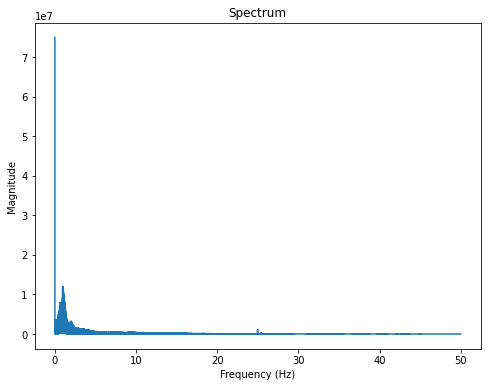

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from obspy import read

# Membaca file MiniSEED
st = read('UT.STN12.A2_C150.miniseed')

# Mengambil komponen yang diinginkan
trace = st[0]  # Mengambil trace pertama
data = trace.data  # Mengambil data dari trace
sampling_rate = trace.stats.sampling_rate  # Mengambil tingkat sampel

# Menghitung panjang data dan waktu
num_samples = len(data)
duration = num_samples / sampling_rate

# Menerapkan FFT pada data
fft_result = np.fft.fft(data)
frequencies = np.fft.fftfreq(num_samples, 1 / sampling_rate)
half_spectrum = fft_result[:num_samples // 2]
half_frequencies = frequencies[:num_samples // 2]

# Plot spektrum frekuensi
plt.figure(figsize=(8, 6))
plt.plot(half_frequencies, np.abs(half_spectrum))
plt.title('Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()


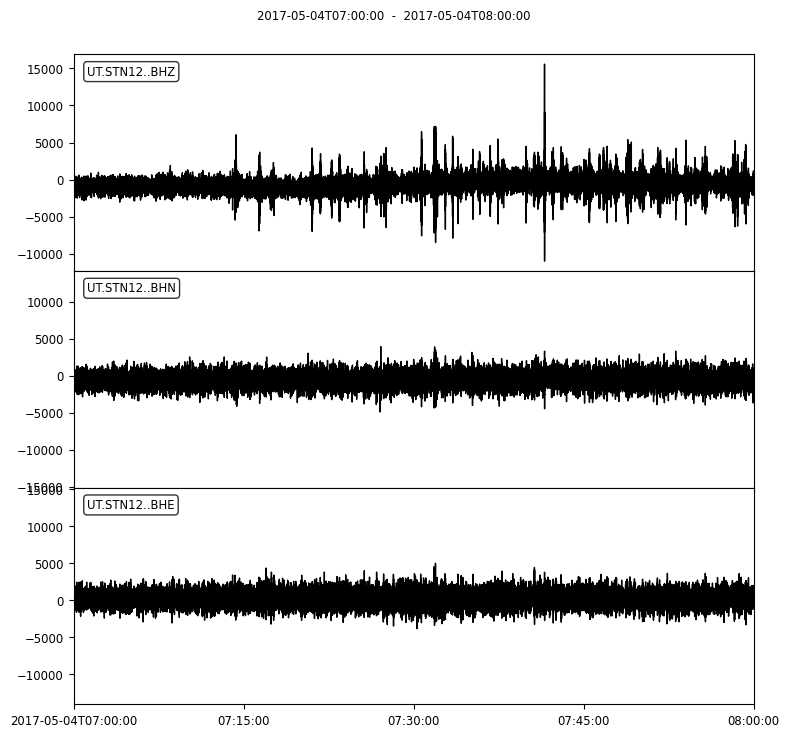

[<obspy.core.trace.Trace object at 0x0000012E3A7B5310>, <obspy.core.trace.Trace object at 0x0000012E3A7B5310>, <obspy.core.trace.Trace object at 0x0000012E3A7B5310>, <obspy.core.trace.Trace object at 0x0000012E3A7B5310>, <obspy.core.trace.Trace object at 0x0000012E3A7B5310>, <obspy.core.trace.Trace object at 0x0000012E3A7B5310>]
2017-05-04T07:00:00.000000Z
2017-05-04T08:00:00.000000Z


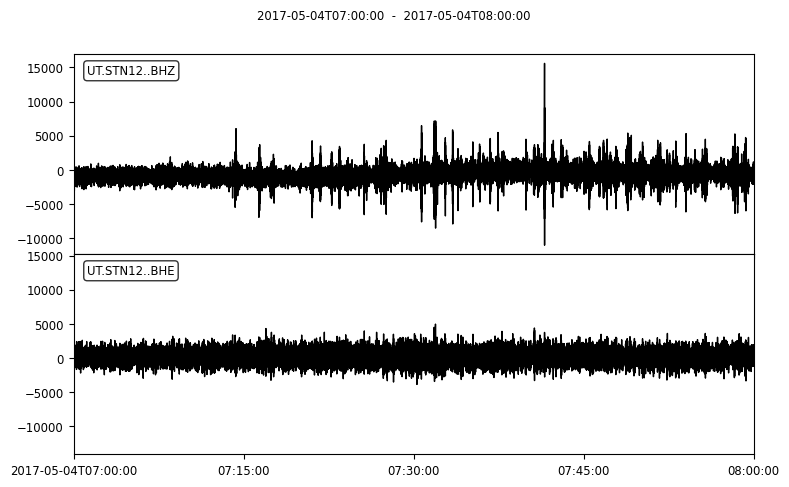

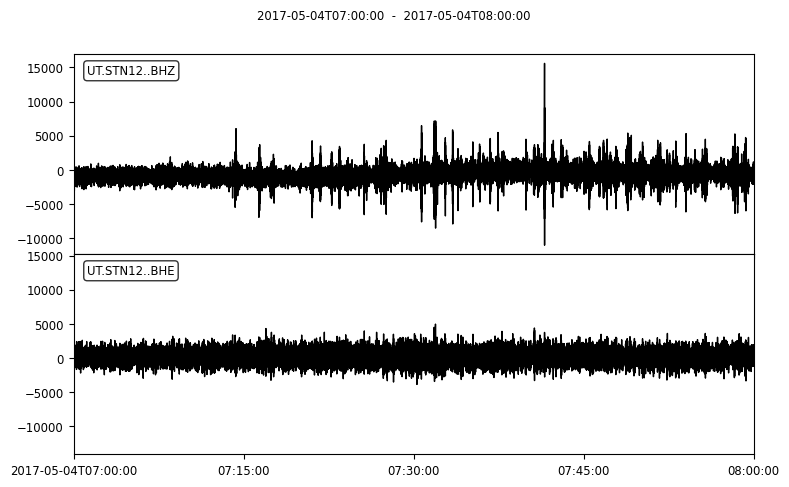

In [69]:
import obspy
import numpy as np
import matplotlib.pyplot as plt
from copy import copy

file_path = 'UT.STN12.A2_C150.miniseed'

# Membaca data MiniSEED menggunakan ObsPy
st = obspy.read(file_path)
st.plot()
# Memecah komponen X, Y, dan Z
trace_x = st.select(channel="*N")[0]
#trace_x2 = copy(trace_x)
trace_y = st.select(channel="*E")[0]
trace_z = st.select(channel="*Z")[0]
size = 600
start = trace_x.stats.starttime
end = trace_x.stats.endtime
result = []
for i in range(int((end - start)/size)):
    st_time = start + i * size
    en_time = st_time + size
    trim = trace_x.trim(st_time, en_time)
    result.append(trim)
print(result)
print(start)
print(end)
st.plot()

In [54]:
class hvsr:
    def __init__(self, data, size):
        self.data = data
        self.size = size
        
    def window(self):
        start = self.data.stats.starttime
        end = self.data.stats.endtime
        self.result = []
        for i in range(int((end - start)/self.size)):
            st_time = start + i * self.size
            en_time = st_time + self.size
            trim = self.data.trim(st_time, en_time)
            self.result.append(trim)
        #print(self.result[1].data)

    def hvsr_2(self):
        res_win = self.result
    
        #sampling_rate = self.data.stats.sampling_rate
        
        plt.figure(figsize=(8,6))
        for trace in res_win:
            sampling_rate = trace.stats.sampling_rate
            print(trace)
            fft = np.fft.fft(trace.data)
            freq = np.fft.fftfreq(self.size, 1/sampling_rate)
            half_spec = fft[:self.size//2]
            half_freq = freq[:self.size//2]
            mag = np.abs(half_spec)
            
            plt.plot(half_freq, mag)
        plt.title('Spectrum')
        plt.xlim(0.01, 5)
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Magnitude')
        plt.show()

my_hvsr = hvsr(trace_x, 60)
my_hvsr.window()
my_hvsr.hvsr_2()


13.76s - Error inserting pydevd breaks.
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\debugpy\_vendored\pydevd\_pydevd_frame_eval\pydevd_modify_bytecode.py", line 328, in insert_pydevd_breaks
    for new_instruction in get_instructions_to_add(
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\debugpy\_vendored\pydevd\_pydevd_frame_eval\pydevd_modify_bytecode.py", line 102, in get_instructions_to_add
    Instr("LOAD_CONST", _pydev_stop_at_break, lineno=stop_at_line - 1),
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\debugpy\_vendored\pydevd\_pydevd_frame_eval\vendored\bytecode\instr.py", line 171, in __init__
    self._set(name, arg, lineno)
  File "C:\Users\User\AppD

IndexError: list index out of range

In [17]:
def window(data, len_win):
    start = data.stats.starttime
    end = data.stats.endtime
    result = []
    for i in range(int((end - start)/len_win)):
        st_time = start + i * len_win
        en_time = st_time + len_win
        trim = data.trim(st_time, en_time)
        result.append(trim)
    return result

window(trace_X2, 30)

NameError: name 'trace_X2' is not defined

In [29]:

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

class hvsr:
    def __init__(self.data, size):
        data = self.data
        size = self.size
        
    def window(self):
        start = self.data.stats.starttime
        end = self.data.stats.endtime
        self.result = []
        for i in range(int((end - start)/self.size)):
            st_time = start + i * self.size
            en_time = st_time + self.size
            trim = self.data.trim(st_time, en_time)
            self.result.append(trim)

    def hvsr_2(self):
        res_win = self.result
        
        plt.figure(figsize=(8,6))
        for i in len(res_win):
            sampling_rate = res_win[i].stats.sampling_rate
            fft = np.fft.fft(res_win[i])
            freq = np.fft.fftfreq(size, 1/sampling_rate)
            half_spec = fft[:size//2]
            half_freq = freq[:size//2]
            mag = np.abs(half_spec)
            
            plt.plot(half_freq, mag)
        
        plt.title('Spectrum')
        plt.xlim(0.01, 5)
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Magnitude')
        plt.show()


def hvsr(signal_data, size):
    dur = signal_data.stats.endtime - signal_data.stats.starttime
    win = signal.windows.boxcar(size, sym=False)
    print(win)
    wind = np.ones(size)
    sampling_rate = signal_data.stats.sampling_rate
    trace_data = signal_data.data
    num_sample = len(trace_data)
    num_win = num_sample 
   

    plt.figure(figsize=(8,6))
    for i in range(num_win):
        start = i * size
        end = start + size 
        win_signal = trace_data[start:end] * win
        result = np.fft.fft(win_signal)
        
        freq = np.fft.fftfreq(size, 1/sampling_rate)
        half_spec = result[:size//2]
        half_freq = freq[:size//2]
        mag = np.abs(half_spec)
        
        plt.plot(half_freq, mag)
        
    print(len(half_freq))
    print(len(half_spec))
    
    plt.title('Spectrum')
    plt.xlim(0.01, 5)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.show()

#hvsr(trace_x, 60)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


ValueError: operands could not be broadcast together with shapes (0,) (300,) 

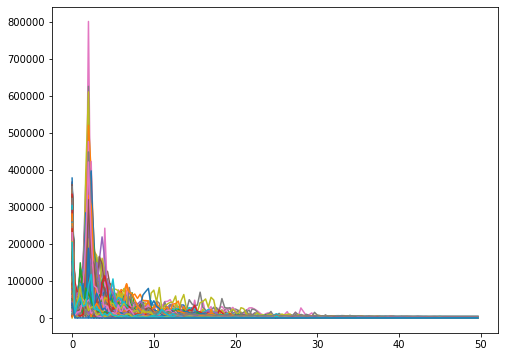

In [30]:
hvsr(trace_z, 300)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from obspy import read

# Membaca file MiniSEED
st = read('path_to_your_file.mseed')

# Mengambil komponen yang diinginkan
trace = st[0]  # Mengambil trace pertama
data = trace.data  # Mengambil data dari trace
sampling_rate = trace.stats.sampling_rate  # Mengambil tingkat sampel

# Menerapkan windowing dengan fungsi boxcar pada sinyal
window_size = 100  # Ukuran window dalam sampel
num_samples = len(data)  # Jumlah sampel
num_windows = num_samples // window_size  # Jumlah window

# Plot hasil FFT
plt.figure(figsize=(8, 6))

for i in range(num_windows):
    start_index = i * window_size
    end_index = start_index + window_size
    window = np.ones(window_size)  # Menggunakan window boxcar
    windowed_signal = data[start_index:end_index] * window
    fft_result = np.fft.fft(windowed_signal)

    frequencies = np.fft.fftfreq(window_size, 1/sampling_rate)
    half_spectrum = fft_result[:window_size//2]
    half_frequencies = frequencies[:window_size//2]
    magnitude_spectrum = np.abs(half_spectrum)

    plt.plot(half_frequencies, magnitude_spectrum)

plt.title('Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()


KeyboardInterrupt: 

In [ ]:
hvsr(trace_x, 60)

In [ ]:
import obspy

# Path file MiniSEED
file_path = 'UT.STN12.A2_C150.miniseed'

# Membaca data MiniSEED menggunakan ObsPy
st = obspy.read(file_path)

# Memecah komponen X, Y, dan Z
trace_x = st.select(channel="*N")[0]
trace_y = st.select(channel="*E")[0]
trace_z = st.select(channel="*Z")[0]

print(trace_x)
# Mendapatkan data dari masing-masing komponen
data_x = trace_x.data
data_y = trace_y.data
data_z = trace_z.data

# Menampilkan data dari masing-masing komponen
print("Data Komponen X:")
print(data_x)
print("\nData Komponen Y:")
print(data_y)
print("\nData Komponen Z:")
print(data_z)

UT.STN12..BHN | 2017-05-04T07:00:00.000000Z - 2017-05-04T08:00:00.000000Z | 100.0 Hz, 360001 samples
Data Komponen X:
[-409 -496 -562 ...  -56 -239 -375]

Data Komponen Y:
[-462 -545 -602 ... -457 -586 -720]

Data Komponen Z:
[-1966 -1922 -1982 ...  -123  -132  -132]


In [ ]:
s = window(data_x, 40)
print(s)


[array([6464.        , 6463.99994118, 6463.99976472, ..., 6463.99947061,
       6463.99976472, 6463.99994118])]


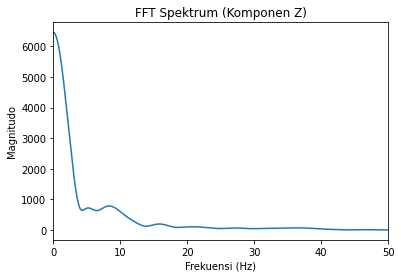

In [ ]:
num_sample = len(data_x)
sampling = trace_x.stats.sampling_rate
nyquis = sampling/2
for spec in s:
    frequencies = np.fft.fftfreq(num_sample, 1/sampling)
    half_spectrum = spec[:num_sample//2]
    half_frequencies = frequencies[:num_sample//2]

    # Menghitung magnitudo spektrum
    mag = np.abs(spec)
    magnitude_spectrum = np.abs(half_spectrum)

    # Menampilkan plot spektrum
    plt.plot(half_frequencies, magnitude_spectrum)
plt.title('FFT Spektrum (Komponen Z)')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Magnitudo')
plt.xlim(0, nyquis)  # Menampilkan hingga frekuensi Nyquist
plt.show()

In [ ]:
print("k")

k


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Membuat sinyal contoh
duration =   # Durasi sinyal dalam detik
sampling_rate = 1000  # Tingkat sampel dalam Hz
num_samples = int(duration * sampling_rate)  # Jumlah sampel

# Membuat waktu sampel
t = np.linspace(0, duration, num_samples)

# Membuat sinyal sinusoid dengan frekuensi 10 Hz
frequency = 10
signal = np.sin(2 * np.pi * frequency * t)

# Menerapkan windowing boxcar berulang pada sinyal
window_size = 100  # Ukuran window dalam sampel
num_windows = num_samples // window_size  # Jumlah window

# Membuat array untuk menyimpan hasil FFT
fft_results = []

for i in range(num_windows):
    start_index = i * window_size
    end_index = start_index + window_size
    windowed_signal = signal[start_index:end_index] * np.hanning(window_size)
    fft_result = np.fft.fft(windowed_signal)
    fft_results.append(fft_result)

# Mengubah hasil FFT menjadi array
fft_results_array = np.array(fft_results)

# Mengubah hasil FFT menjadi list
fft_results_list = fft_results

# Menampilkan hasil FFT (Array)
print("Hasil FFT (Array):")
print(fft_results_array)

# Menampilkan hasil FFT (List)
print("Hasil FFT (List):")
print(fft_results_list)



Hasil FFT (Array):
[[ 7.09867228e-01+0.00000000e+00j  7.22095869e-02-2.46688442e+01j
  -4.37068585e-01+1.26023748e+01j  3.90395510e-03-7.33241726e-02j
   1.61672238e-03-2.25931833e-02j  9.22920110e-04-1.02666474e-02j
   6.06051081e-04-5.59414360e-03j  4.31619866e-04-3.40034853e-03j
   3.24402889e-04-2.22606611e-03j  2.53448050e-04-1.53826063e-03j
   2.03917214e-04-1.10779043e-03j  1.67910632e-04-8.24259386e-04j
   1.40885509e-04-6.29755420e-04j  1.20069719e-04-4.91813654e-04j
   1.03689725e-04-3.91235949e-04j  9.05661401e-05-3.16158403e-04j
   7.98889788e-05-2.58973223e-04j  7.10865293e-05-2.14645525e-04j
   6.37456630e-05-1.79751140e-04j  5.75616818e-05-1.51905252e-04j
   5.23057925e-05-1.29411718e-04j  4.78034498e-05-1.11041508e-04j
   4.39195973e-05-9.58890928e-05j  4.05484010e-05-8.32771969e-05j
   3.76059744e-05-7.26923258e-05j  3.50251372e-05-6.37403064e-05j
   3.27515820e-05-5.61151082e-05j  3.07410320e-05-4.95766415e-05j
   2.89571074e-05-4.39347220e-05j  2.73697049e-05-3.90373

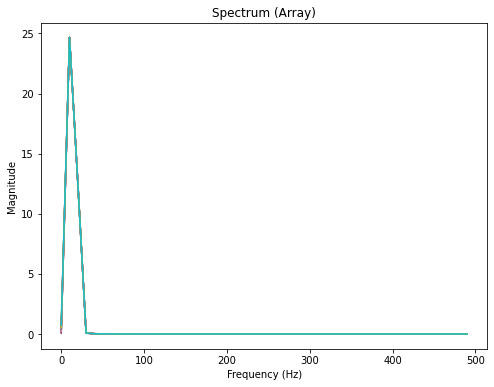

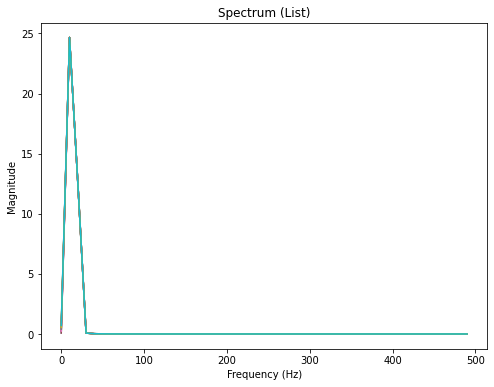

In [ ]:
# Plot hasil FFT (Array)
plt.figure(figsize=(8, 6))
for fft_result in fft_results_array:
    frequencies = np.fft.fftfreq(window_size, 1/sampling_rate)
    half_spectrum = fft_result[:window_size//2]
    half_frequencies = frequencies[:window_size//2]
    magnitude_spectrum = np.abs(half_spectrum)
    plt.plot(half_frequencies, magnitude_spectrum)
plt.title('Spectrum (Array)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

# Plot hasil FFT (List)
plt.figure(figsize=(8, 6))
for fft_result in fft_results_list:
    frequencies = np.fft.fftfreq(window_size, 1/sampling_rate)
    half_spectrum = fft_result[:window_size//2]
    half_frequencies = frequencies[:window_size//2]
    magnitude_spectrum = np.abs(half_spectrum)
    plt.plot(half_frequencies, magnitude_spectrum)
plt.title('Spectrum (List)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()
